## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [24]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [25]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Anadu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [26]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [27]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [28]:
df

,Tweet,Sentiment
0,@WforWoman #WSaleLove \nans 9: Depressing it w...,0
1,@BotchFrivarg @SusanYura and a me hiding behin...,1
2,@GeenaEhlich I know fml :(,0
3,@xjisoobelle no money :(,0
4,That new Real Madrid away kit looks like a nig...,1
...,...,...
9995,@noodles78 Message us right here Nicola and we...,1
9996,@_bleh09 interesting. I've never heard of it b...,1
9997,@HardcoreGooners @tashagunners @kirstyburns3 @...,1
9998,@723qian @xcmainex tonight I got photoshoooot :(,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [29]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [30]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
5558,"@kidrauhLogan FOLLOWED ME THANKS, AND\n@justin...",0
1223,@SullensScarlett thanks for tweeting about me :),1
9631,"Man right now, I wish someone would bring me f...",0
6016,Whom do you really love? — i love all who did ...,1
8580,@benfosterdev Indeed. May I email you for a bi...,1
...,...,...
6140,Here's a reminder. As if we needed one :-) htt...,1
628,@davygus Glue factory for Kuchar :-(,0
5415,@surfboyliam fback? :),1
1856,Help me be materialistic and enter this showpo...,1


In [31]:
test

,Tweet,Sentiment
318,@selenagomez noooooo I wasn't online when u we...,0
113,"Here it is, our #crowdfunding campaign! If we ...",1
9543,#Jilla Decent Opening &amp; Reviews :)),1
8502,@AWSSupport Thanks - can someone maybe look at...,0
2902,"""Exclusive to Germany"" how unfair is that? :( ...",0
...,...,...
7989,Went to bed with headache...woke up with heada...,0
7334,My Rumbelle feels are just too overwhelming......,0
3063,"I'm proud of my heart, it's been played, stabb...",0
1328,I have a bad sleep difficiency :(,0


# Solution Provided

Here are the steps to be followed:
1. Import the necessary libraries
2. Load the dataset
3. Remove the '@' mentions and URL links
4. Create new features from identifying happy emoticons
5. Use a decision tree classifier to classify the sentiment of the tweets
6. Evaluate the model

## Results using Decision Tree Classifier
Accuracy: 0.916
F1: 0.9128630705394191
Precision: 0.9322033898305084
Recall: 0.8943089430894309

## Results using Random Forest Classifier
# Solution Provided

Here are the steps to be followed:
1. Import the necessary libraries
2. Load the dataset
3. Remove the '@' mentions and URL links
4. Create new features from identifying happy emoticons
5. Use a decision tree classifier to classify the sentiment of the tweets
6. Evaluate the model

## Results using Decision Tree Classifier
Accuracy: 0.916
F1: 0.913
Precision: 0.932
Recall: 0.894

## Results using Random Forest Classifier
Accuracy: 0.924
F1: 0.917
Precision: 0.981
Recall: 0.861

# Results using Logistic Regression Classifier
Accuracy: 0.929
F1: 0.924
Precision: 0.982
Recall: 0.872

# Results using Naive Bayes Classifier
Accuracy: 0.901
F1: 0.901
Precision: 0.886
Recall: 0.917

# Results using Support Vector Machine Classifier
Accuracy: 0.93
F1: 0.924
Precision: 0.993
Recall: 0.864


# Table with results

| Classifier | Accuracy | F1 | Precision | Recall |
| --- | --- | --- | --- | --- |
| Decision Tree | 0.916 | 0.913 | 0.932 | 0.894 |
| Random Forest | 0.924 | 0.917 | 0.981 | 0.861 |
| Logistic Regression | 0.929 | 0.924 | 0.982 | 0.872 |
| Naive Bayes | 0.901 | 0.901 | 0.886 | 0.917 |
| Support Vector Machine | 0.93 | 0.924 | 0.993 | 0.864 |

# Conclusion
The best classifier for this dataset are the Logistic Regression and Support Vector Machine classifiers with an F1 score of 0.924.



In [32]:
# Importing libraries for feature extraction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# downloads sample twitter dataset.
nltk.download('twitter_samples')

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])

# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1

# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])

# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0

# Combe positive and negative tweets in one single dataframe
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)

df.reset_index(drop=True, inplace=True)

# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Anadu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Dataset size: (10000, 2)


In [33]:
# Data Cleaning

# remove @ symbol from the tweets
train['Tweet'] = train['Tweet'].str.replace('@', '')
test['Tweet'] = test['Tweet'].str.replace('@', '')

# remove urls from the tweets
train['Tweet'] = train['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
test['Tweet'] = test['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

df = pd.concat([train, test], ignore_index=True)

df


,Tweet,Sentiment
0,Edsa y u do dis 2 me\n\nSo tired. Just wanna g...,0
1,hswift65 roseofthesealee PS I took 80-1 so I a...,1
2,"AlamiHasson #دعمم للعودة للحياة, Heiyo, visit ...",1
3,Current playlist :D,1
4,"Good morning, Twitter friends! Hope you all ha...",0
...,...,...
9995,"benrwms Oh no Ben :-( That is terrible, please...",0
9996,Alone :-( :'( :-\,0
9997,I hate being an adult sometimes :(,0
9998,iAhmedMallick LightAgayi \nAur ap bhi is me sh...,0


In [36]:
# Feature Creation
import scipy.sparse as sp

positive_emoticons = [':)', ':"', ': )', ':P', ':D']

def contains_positive_emoticon(tweet):
    return any(emoticon in tweet for emoticon in positive_emoticons)

# binary feature with 1 if tweet contains positive emoticon and 0 otherwise
df['PositiveEmoticon'] = df['Tweet'].apply(contains_positive_emoticon).astype(int)

df

X = CountVectorizer().fit_transform(df['Tweet'])

# Combine the vectorized text with the 'PositiveEmoticon' feature
X_combined = sp.hstack((X, df[['PositiveEmoticon']]))


In [37]:

# Labels
y = df['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.1, random_state=42)

# Use DecisionTreeClassifier instead of SVM
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the labels
y_pred = classifier.predict(X_test)

# Caluculate the statistics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1:', f1)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.916
F1: 0.9128630705394191
Precision: 0.9322033898305084
Recall: 0.8943089430894309


In [38]:
# Try with random forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the labels
y_pred = classifier.predict(X_test)

# Caluculate the statistics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1:', f1)
print('Precision:', precision)
print('Recall:', recall)



Accuracy: 0.933
F1: 0.9281886387995714
Precision: 0.981859410430839
Recall: 0.8800813008130082


In [39]:
# Try with logistic regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Predict the labels
y_pred = classifier.predict(X_test)

# Caluculate the statistics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1:', f1)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.929
F1: 0.9235737351991389
Precision: 0.9816933638443935
Recall: 0.8719512195121951


In [40]:
# Try with Naive Bayes
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the labels
y_pred = classifier.predict(X_test)

# Caluculate the statistics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1:', f1)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.901
F1: 0.901098901098901
Precision: 0.8860510805500982
Recall: 0.9166666666666666


In [41]:
# Try with SVM
from sklearn.svm import SVC

classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

# Predict the labels
y_pred = classifier.predict(X_test)

# Caluculate the statistics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1:', f1)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.93
F1: 0.9239130434782609
Precision: 0.9929906542056075
Recall: 0.8638211382113821


Positive words


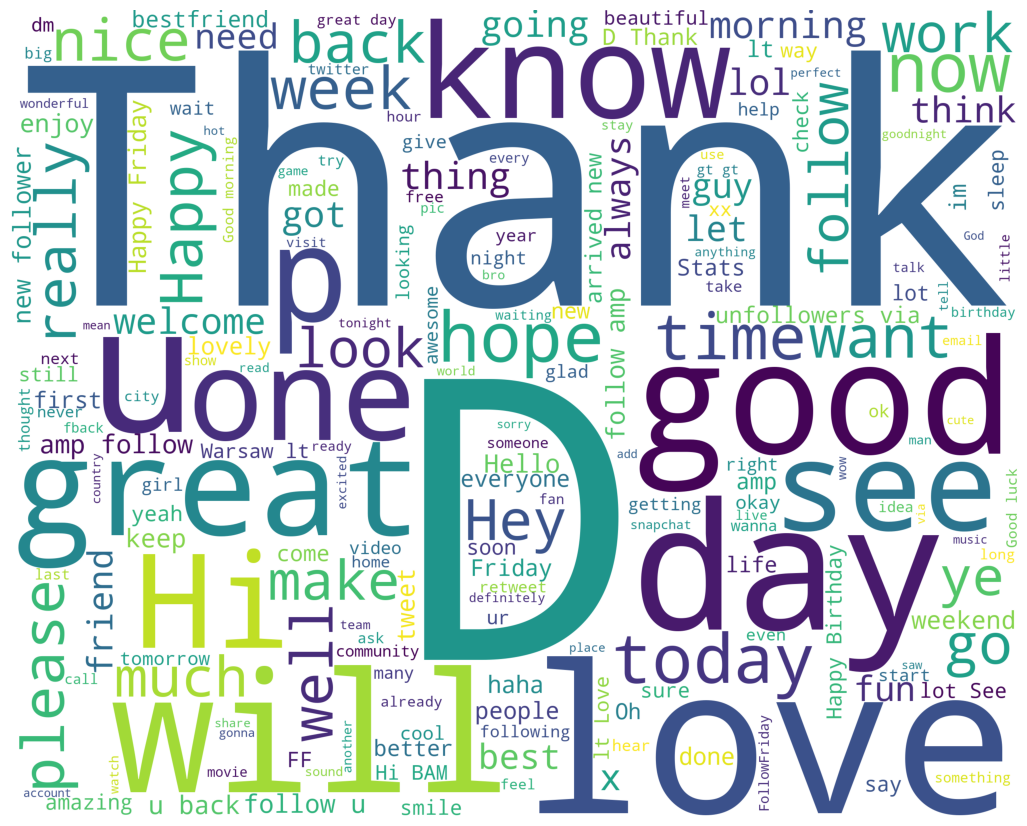

Negative words


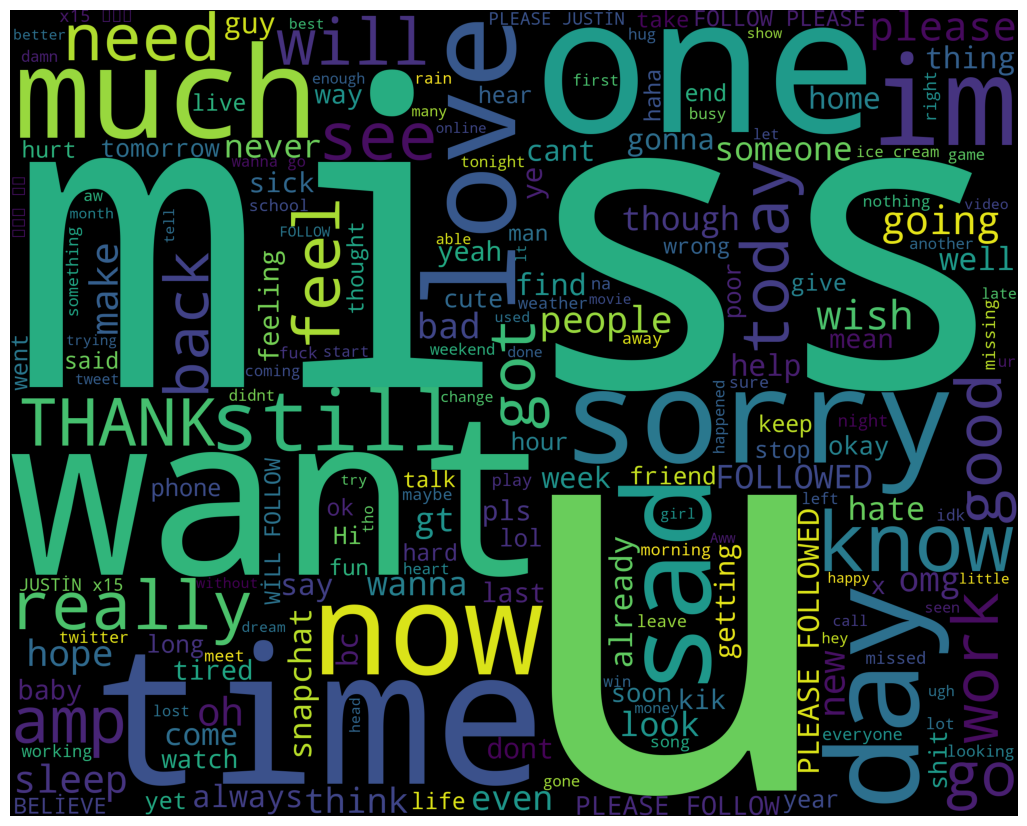

In [61]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anadu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [13]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

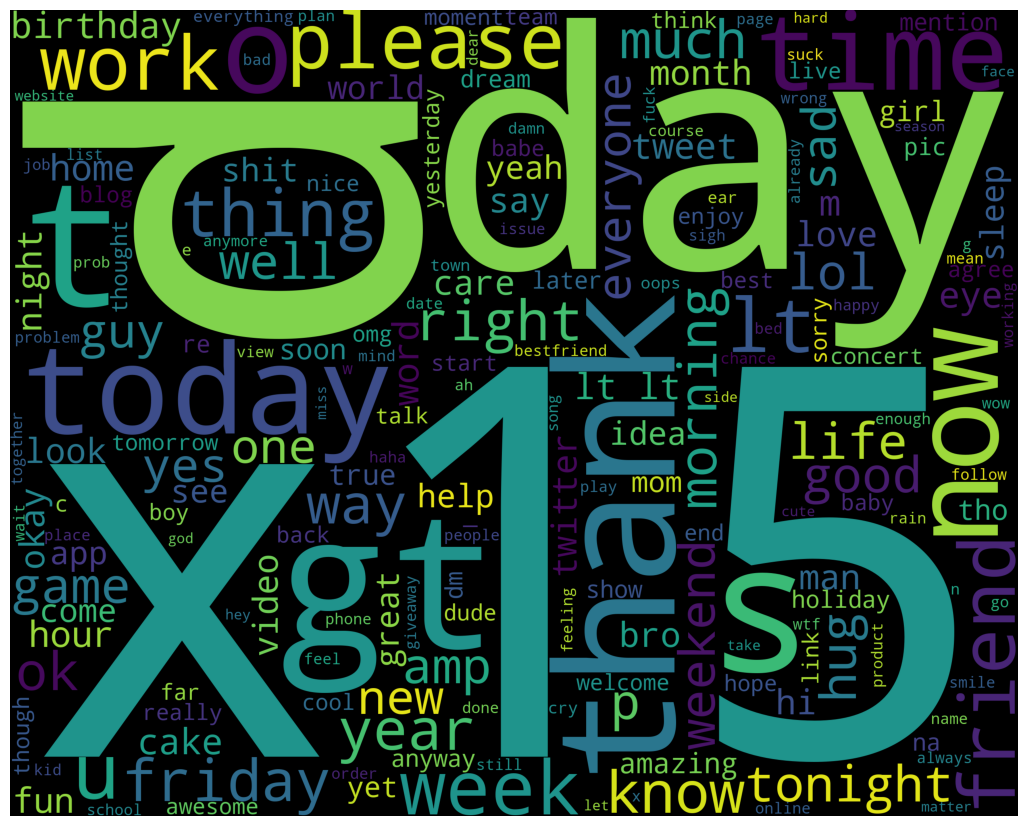

In [14]:
wordcloud_draw(w_features)

In [51]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

KeyboardInterrupt: 

In [50]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Anadu\AppData\Local\Temp\ipykernel_6212\4162083126.py", line 4, in <module>
    res =  classifier.classify(extract_features(obj.split()))
  File "C:\Users\Anadu\AppData\Roaming\Python\Python310\site-packages\nltk\classify\naivebayes.py", line 89, in classify
    return self.prob_classify(featureset).max()
  File "C:\Users\Anadu\AppData\Roaming\Python\Python310\site-packages\nltk\classify\naivebayes.py", line -1, in prob_classify
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Python310\lib\site-packages\IPython\core\ultratb.py", line 1310, in structure

In [17]:
### Find F1, Precision, Recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_true = test['Sentiment']
y_pred = [classifier.classify(extract_features(tweet.split())) for tweet in test['Tweet']]
precision = precision_score(y_true, y_pred)

recall = recall_score(y_true, y_pred)

f1 = 2 * (precision * recall) / (precision + recall)

print('F1 score: %f' % f1)
print('Precision: %f' % precision)
print('Recall: %f' % recall)



Precision: 0.788698
Recall: 0.675789
F1 score: 0.727891


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [18]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[439  86]
 [154 321]]


In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [20]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


F1 Score: 0.7580470470835919
Recall: 0.76
Precision: 0.7632908088220061


In [21]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.76


In [27]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)


Accuracy: 0.739
F1 Score: 0.738398293751302
Precision: 0.7390476518107203
Recall: 0.739
Confusion Matrix:
 [[409 116]
 [145 330]]


In [28]:
# promptL same as the above but with SVM

from sklearn.svm import SVC

# Train a Support Vector Machine model
model = SVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

Accuracy: 0.737
F1 Score: 0.7354642432821861
Precision: 0.7384585385878488
Recall: 0.737
Confusion Matrix:
 [[421 104]
 [159 316]]


In [38]:
from sklearn.experimental import enable_hist_gradient_boosting  # Required to enable HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Train a HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier()

# No need to use .toarray(), HistGradientBoostingClassifier can handle sparse matrices
model.fit(X_train_vectorized, y_train)




HistGradientBoostingClassifier()

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

Accuracy: 0.709
F1 Score: 0.7073007406658408
Precision: 0.7099527914614122
Recall: 0.709
Confusion Matrix:
 [[407 118]
 [173 302]]


In [24]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)


Accuracy: 0.602
F1 Score: 0.5643565553942913
Precision: 0.6871695582572579
Recall: 0.602
Confusion Matrix:
 [[165 360]
 [ 38 437]]


In [26]:
# prompt: add sentiment analysis with Vader library

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


                                                  Tweet   
3496  Hey @Indie_Shell Thanks For Following :) \n\n#...  \
5954  Tips ONLINE!\n6/7 WINNERS yesterday!\nJust 1 g...   
9077                                   over slept:):):)   
386   @MSLJim You're welcome Jim! Made me chuckle on...   
418   @JaydnNeal1 Aw bless you, this made me smile! ...   
...                                                 ...   
2382                I'm sad yall thought it was real :(   
4566  @Condor_Ferries how's things looking for tomor...   
6518  Stats for the day have arrived. 1 new follower...   
1144  @Miss_J_Hart @staffrm well, I'm only on P.41 &...   
5705  @parapluieverte Glad you enjoyed your journey!...   

                                       Sentiment Scores  Compound Score   
3496  {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...          0.7096  \
5954  {'neg': 0.149, 'neu': 0.507, 'pos': 0.345, 'co...          0.7788   
9077  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0